# Installing Dependancies


In [1]:
import gpxpy
import gpxpy.gpx

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

from geopy.distance import distance
from geopy.distance import geodesic
from geopy import distance
import math

import haversine as hs
import numpy as np

import datetime
from time import strftime
from time import gmtime



plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

In [3]:

with open('Routes/my_runs/Bull_Run_50M_2018.gpx', 'r') as gpx_file:
    BRgpx = gpxpy.parse(gpx_file)

In [4]:
BRgpx

GPX(tracks=[GPXTrack(name='Bull Run Run', segments=[GPXTrackSegment(points=[...])])])

In [5]:
BRgpx.get_track_points_no()

14965

# Loading a GPX file


In [6]:
# Loading a GPX file
with open('Routes//my_runs/2-loop_mtvernon.gpx', 'r') as gpx_file:
    loop2gpx = gpxpy.parse(gpx_file)

In [7]:

print(loop2gpx.get_track_points_no())
print(loop2gpx.get_elevation_extremes())
print(loop2gpx.get_uphill_downhill())
print('# of tracks - ',len(loop2gpx.tracks))
print('# of segments - ',len(loop2gpx.tracks[0].segments))

4304
MinimumMaximum(minimum=-27.200000762939453, maximum=28.399999618530273)
UphillDownhill(uphill=284.19998838156533, downhill=302.59998800009583)
# of tracks -  1
# of segments -  1


In [8]:
loop2gpx.tracks[0].segments[0].points[:4]

[GPXTrackPoint(38.79649353213608, -77.04552322626114, elevation=-3.0, time=datetime.datetime(2021, 11, 19, 14, 52, 53, tzinfo=SimpleTZ("Z"))),
 GPXTrackPoint(38.79648883827031, -77.04551886767149, elevation=-3.0, time=datetime.datetime(2021, 11, 19, 14, 52, 54, tzinfo=SimpleTZ("Z"))),
 GPXTrackPoint(38.796473080292344, -77.04550998285413, elevation=-3.0, time=datetime.datetime(2021, 11, 19, 14, 52, 55, tzinfo=SimpleTZ("Z"))),
 GPXTrackPoint(38.79645690321922, -77.04550285823643, elevation=-3.0, time=datetime.datetime(2021, 11, 19, 14, 52, 56, tzinfo=SimpleTZ("Z")))]

In [9]:
# making a dictionary that can be converted to Pandas Dataframe
route_info=[]

for track in DDgpx.tracks:
    for segment in track.segments:
        for point in segment.points:
            route_info.append({
                'time': point.time,
                'latitude': point.latitude,
                'longitude':point.longitude,
                'elevation': point.elevation
            })

route_info[:3]

[{'time': datetime.datetime(2018, 4, 7, 10, 30, 3, tzinfo=SimpleTZ("Z")),
  'latitude': 38.76730288378894,
  'longitude': -77.40843029692769,
  'elevation': 104.0},
 {'time': datetime.datetime(2018, 4, 7, 10, 30, 4, tzinfo=SimpleTZ("Z")),
  'latitude': 38.76729995012283,
  'longitude': -77.40842811763287,
  'elevation': 104.0},
 {'time': datetime.datetime(2018, 4, 7, 10, 30, 6, tzinfo=SimpleTZ("Z")),
  'latitude': 38.76727723516524,
  'longitude': -77.40841797553003,
  'elevation': 104.0}]

In [10]:
df = pd.DataFrame(route_info)
df.head()

,time,latitude,longitude,elevation
0,2018-04-07 10:30:03+00:00,38.767303,-77.408430,104.000000
1,2018-04-07 10:30:04+00:00,38.767300,-77.408428,104.000000
2,2018-04-07 10:30:06+00:00,38.767277,-77.408418,104.000000
3,2018-04-07 10:30:09+00:00,38.767222,-77.408395,104.400002
4,2018-04-07 10:30:12+00:00,38.767160,-77.408343,105.000000


# Create Simple BASE CSV file


In [11]:

df.to_csv('data/df.csv', index=False)

# Simple plots


## Plot the Route


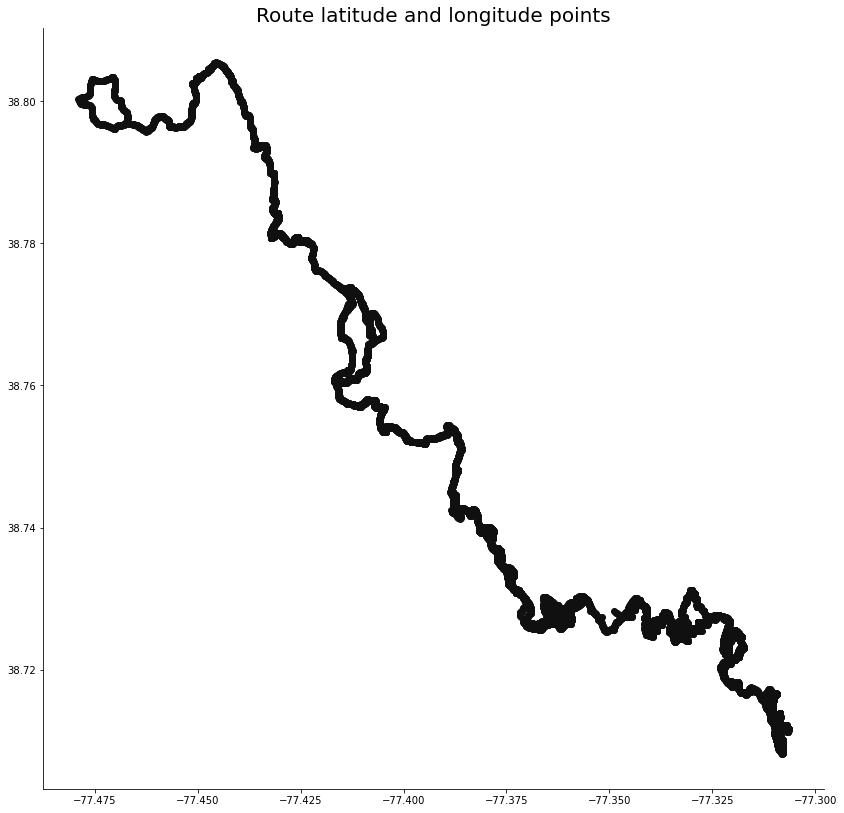

In [12]:
plt.figure(figsize=(14, 14))
plt.scatter(df['longitude'], df['latitude'], color='#101010')
plt.title('Route latitude and longitude points', size=20);

## Plot the Elevation


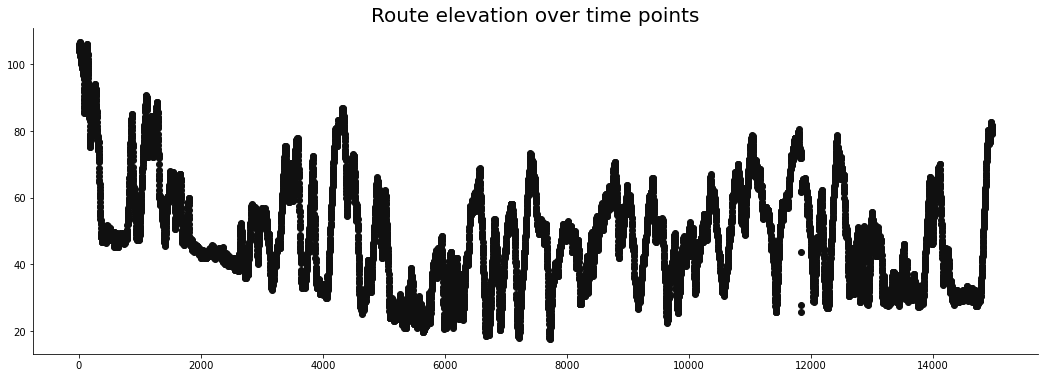

In [13]:
plt.figure(figsize=(18,6))
plt.scatter(df.index, df['elevation'], color='#101010')
plt.title('Route elevation over time points', size=20);

In [14]:
df.head()

,time,latitude,longitude,elevation
0,2018-04-07 10:30:03+00:00,38.767303,-77.408430,104.000000
1,2018-04-07 10:30:04+00:00,38.767300,-77.408428,104.000000
2,2018-04-07 10:30:06+00:00,38.767277,-77.408418,104.000000
3,2018-04-07 10:30:09+00:00,38.767222,-77.408395,104.400002
4,2018-04-07 10:30:12+00:00,38.767160,-77.408343,105.000000


In [15]:
pointxyz = []
for i in range(0,len(df)):
    pointxyz.append((df['latitude'][i], df['longitude'][i], df['elevation'][i]))

pointxyz[0]

(38.76730288378894, -77.40843029692769, 104.0)

In [16]:
df['pointxyz']= pd.Series(pointxyz)
df.head()

,time,latitude,longitude,elevation,pointxyz
0,2018-04-07 10:30:03+00:00,38.767303,-77.408430,104.000000,"(38.76730288378894, -77.40843029692769, 104.0)"
1,2018-04-07 10:30:04+00:00,38.767300,-77.408428,104.000000,"(38.76729995012283, -77.40842811763287, 104.0)"
2,2018-04-07 10:30:06+00:00,38.767277,-77.408418,104.000000,"(38.76727723516524, -77.40841797553003, 104.0)"
3,2018-04-07 10:30:09+00:00,38.767222,-77.408395,104.400002,"(38.767221914604306, -77.40839484147727, 104.4..."
4,2018-04-07 10:30:12+00:00,38.767160,-77.408343,105.000000,"(38.7671600561589, -77.40834253840148, 105.0)"


# Distance Calcs


## Geodesic


In [17]:
b_latlon = df['pointxyz'][1+1][:2]
a_latlon = df['pointxyz'][1][:2]
print(b_latlon,a_latlon)
print(geodesic(a_latlon,b_latlon).miles)

(38.76727723516524, -77.40841797553003) (38.76729995012283, -77.40842811763287)
0.0016598250960285412


In [18]:
# # Get Step distance, i.e. distance between points.
# euc_dist = [0]
# # fl_dist =[0]

# for i in range(len(df)-1):
    
#     b_latlon = df['pointxyz'][i+1][:2]
#     a_latlon = df['pointxyz'][i][:2]

#     # OG elevation in meters (1000m = .6 miles)  so change meters into km and then convert to miles
#     b_elv = df['pointxyz'][i+1][2]/1000*.6
#     a_elv = df['pointxyz'][i][2]/1000*.6
#     eldiff = b_elv-a_elv

#     flat_distance =geodesic(a_latlon,b_latlon).miles
#     # fl_dist.append(flat_distance)

#     euc_distance = math.sqrt(flat_distance**2 + eldiff**2)
#     euc_dist.append(euc_distance)

# df['euc_dist'] = pd.Series(euc_dist)
# # df['flat_dist'] = pd.Series(fl_dist)

# df.head()


## Haversine


In [18]:
def haversine_distance(lat1, lon1, lat2, lon2) -> float:
    distance = hs.haversine(
        point1=(lat1,lon1),
        point2=(lat2,lon2),
        unit=hs.Unit.MILES
    )
    return np.round(distance,8)

In [19]:
haversine_distance(
    lat1=df.iloc[0]['latitude'],
    lon1=df.iloc[0]['longitude'],
    lat2=df.iloc[1]['latitude'],
    lon2=df.iloc[1]['longitude']
)

0.00023424

In [24]:
# clean up errors in speed by capping distance traveled in 1 sec to be = cap_mph miles per hour
distances = [np.nan]
cap_mph = 10
distance_cap = 1/(60/cap_mph*60)

for i in range(len(df)):
    if i == 0:
        continue
    else:
        unit_dist = haversine_distance(
            lat1=df.iloc[i - 1]['latitude'],
            lon1=df.iloc[i - 1]['longitude'],
            lat2=df.iloc[i]['latitude'],
            lon2=df.iloc[i]['longitude']
        )
        # if unit_dist > distance_cap:
        #     distances.append(np.nan)
        # else:
        #     distances.append(unit_dist)
        distances.append(unit_dist)

df['distance'] = distances


In [26]:
df['distance'].sum()
# df.distance.describe()
# df['distance'][740:745]
df[df['distance'].isna()]

,time,latitude,longitude,elevation,pointxyz,distance
0,2018-04-07 10:30:03+00:00,38.767303,-77.40843,104.0,"(38.76730288378894, -77.40843029692769, 104.0)",NaN


In [27]:
df['distance'] = df['distance'].interpolate().fillna(0)

#### Speed Calc


In [28]:
# 1 sec is 1/60th of minute and a minute is 1/60th of an hour so 

speed = []

for i in range(len(df)):
    mph = df['distance'][i]/(1/60/60)
    speed.append(mph)

df['mph'] = pd.Series(speed)



In [29]:
df['mph'].describe()
df[df['mph'].isna()]
# df['mph'][740:745]

,time,latitude,longitude,elevation,pointxyz,distance,mph


#### Elevation Change, Cum Elevation, and Cum Distance


In [30]:
df['elevation_change'] = df['elevation'].diff()
df['cum_elevation'] = df['elevation_change'].cumsum()
df['cum_distance'] = df['distance'].cumsum()
df = df.fillna(0)
df.head()


,time,latitude,longitude,elevation,pointxyz,distance,mph,elevation_change,cum_elevation,cum_distance
0,2018-04-07 10:30:03+00:00,38.767303,-77.408430,104.000000,"(38.76730288378894, -77.40843029692769, 104.0)",0.000000,0.000000,0.000000,0.000000,0.000000
1,2018-04-07 10:30:04+00:00,38.767300,-77.408428,104.000000,"(38.76729995012283, -77.40842811763287, 104.0)",0.000234,0.843264,0.000000,0.000000,0.000234
2,2018-04-07 10:30:06+00:00,38.767277,-77.408418,104.000000,"(38.76727723516524, -77.40841797553003, 104.0)",0.001662,5.982624,0.000000,0.000000,0.001896
3,2018-04-07 10:30:09+00:00,38.767222,-77.408395,104.400002,"(38.767221914604306, -77.40839484147727, 104.4...",0.004020,14.473188,0.400002,0.400002,0.005916
4,2018-04-07 10:30:12+00:00,38.767160,-77.408343,105.000000,"(38.7671600561589, -77.40834253840148, 105.0)",0.005119,18.429192,0.599998,1.000000,0.011036


In [26]:
# range of elevation 
df.describe()

,latitude,longitude,elevation,distance,mph,elevation_change,cum_elevation,cum_distance
count,59640.000000,59640.000000,59640.000000,59640.000000,59640.000000,59640.000000,59640.000000,59640.000000
mean,38.580718,-77.379950,45.231207,0.001103,3.972317,-0.000999,-52.768793,34.999681
std,0.012729,0.025952,36.452463,0.000458,1.649963,0.165107,36.452463,18.875987
min,38.557794,-77.424799,-27.200001,0.000000,0.000000,-1.199997,-125.200001,0.000000
25%,38.571374,-77.406517,19.400000,0.000800,2.878974,0.000000,-78.600000,19.706789
50%,38.576993,-77.375818,43.400002,0.001087,3.912318,0.000000,-54.599998,35.982171
75%,38.592803,-77.354579,74.800003,0.001391,5.009040,0.000000,-23.199997,51.289284
max,38.608468,-77.342196,123.800003,0.002777,9.996084,2.599998,25.800003,65.808048


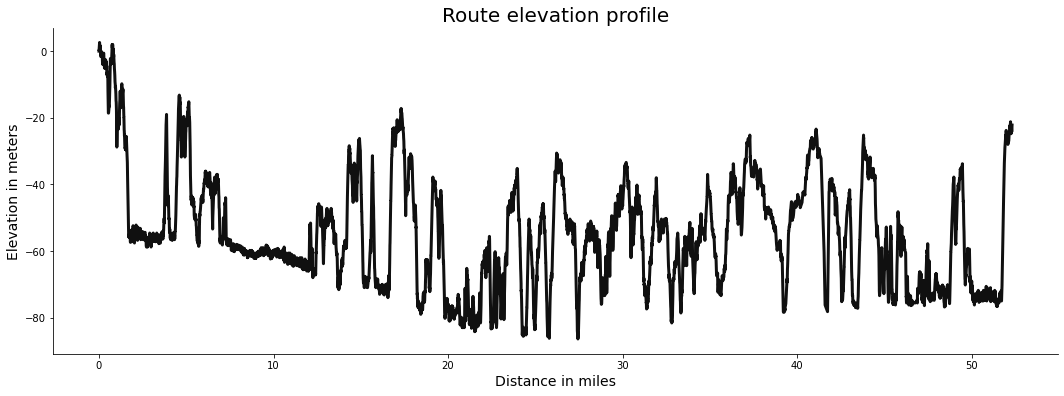

In [31]:
plt.figure(figsize=(18,6))
plt.plot(df['cum_distance'], df['cum_elevation'], color='#101010', lw=3)
plt.title('Route elevation profile', size=20)
plt.xlabel('Distance in miles', size=14)
plt.ylabel('Elevation in meters', size=14);

In [32]:
# df['5sec_rolling_elv'] = df['elevation_change'].rolling(5).mean()
df['second'] = df.index
# df[10:15]

In [33]:
# seconds to time

# alternatively
# strftime("%H:%M:%S", gmtime(3905))
# '00:11:06'

def sec_2_time(seconds):
    str_time = str(datetime.timedelta(seconds=seconds))
    return str_time
sec_2_time(3905)



'1:05:05'

In [34]:
# Adding Elapsed Time
def elapsed_time(row):
    time = str(datetime.timedelta(seconds=row['second']))
    return time

df['elapsed_time']= df.apply(elapsed_time, axis=1)

# Adding steps/distance in feet
df['step_feet'] = df['distance'] * 5280
df.head()


,time,latitude,longitude,elevation,pointxyz,distance,mph,elevation_change,cum_elevation,cum_distance,second,elapsed_time,step_feet
0,2018-04-07 10:30:03+00:00,38.767303,-77.408430,104.000000,"(38.76730288378894, -77.40843029692769, 104.0)",0.000000,0.000000,0.000000,0.000000,0.000000,0,0:00:00,0.000000
1,2018-04-07 10:30:04+00:00,38.767300,-77.408428,104.000000,"(38.76729995012283, -77.40842811763287, 104.0)",0.000234,0.843264,0.000000,0.000000,0.000234,1,0:00:01,1.236787
2,2018-04-07 10:30:06+00:00,38.767277,-77.408418,104.000000,"(38.76727723516524, -77.40841797553003, 104.0)",0.001662,5.982624,0.000000,0.000000,0.001896,2,0:00:02,8.774515
3,2018-04-07 10:30:09+00:00,38.767222,-77.408395,104.400002,"(38.767221914604306, -77.40839484147727, 104.4...",0.004020,14.473188,0.400002,0.400002,0.005916,3,0:00:03,21.227342
4,2018-04-07 10:30:12+00:00,38.767160,-77.408343,105.000000,"(38.7671600561589, -77.40834253840148, 105.0)",0.005119,18.429192,0.599998,1.000000,0.011036,4,0:00:04,27.029482


In [35]:
# Identify times when runner is stopped or moving very slowly
def find_stops(row):
    if row['mph'] < 1:
        return 0
    return 1

df['moving_time'] = df.apply(find_stops, axis=1)

In [36]:
df['distance'].sum()

52.31669352

In [40]:
df.to_csv('data/df_add.csv', index=False)